In [1]:
import numpy as np
import pandas as pd
import h5py
import keras
from keras.models import *
from keras.layers import *
from keras.optimizers import *
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.python.ops import nn

In [2]:
def loss_function_generator(y_pred, y_true):

    total_gen_loss = tf.reduce_mean(tf.abs(y_true - y_pred))
    
    return total_gen_loss

In [8]:
LR = 0.001
filters = [8, 16, 32, 32]
f1=8
f2=16
f3=32
ks=(5, 5)
channel_out = 3
input_size = (142,163,3)
inputs = keras.Input(input_size)

initializer = tf.random_normal_initializer(0., 0.02)
kernel_initializer_N=initializer
activation_N='relu'

Y = keras.layers.Rescaling(1.0/255)(inputs)

conv1 = keras.layers.Conv2D(filters = f1, kernel_size= ks, activation=activation_N,padding = 'same', kernel_initializer = kernel_initializer_N)(Y)
pool1 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)
#pool1 = keras.layers.Activation("relu")(pool1)
conv2 = keras.layers.Conv2D(filters = f2, kernel_size= ks, activation=activation_N,padding = 'same', kernel_initializer = kernel_initializer_N)(pool1)
pool2 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)
#pool2 = keras.layers.Activation("relu")(pool2)
conv3 = keras.layers.Conv2D(filters = f3, kernel_size= ks, activation=activation_N,padding = 'same', kernel_initializer = kernel_initializer_N)(pool2)
pool3 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv3)
#pool3 = keras.layers.Activation("relu")(pool3)
conv4 = keras.layers.Conv2D(filters = f3, kernel_size= ks, activation=activation_N,padding = 'same', kernel_initializer = kernel_initializer_N)(pool3)
pool4 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv4)
conv5 = keras.layers.Conv2D(filters = f3, kernel_size= ks, activation=activation_N,padding = 'same', kernel_initializer = kernel_initializer_N)(pool4)
pool5 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv5)
conv6 = keras.layers.Conv2D(filters = f2, kernel_size= ks, activation=activation_N,padding = 'same', kernel_initializer = kernel_initializer_N)(pool5)
pool6 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv6)
X = keras.layers.Flatten()(pool6)
X = keras.layers.Dense(512, activation='relu')(X)
X = keras.layers.Dense(1, activation='sigmoid')(X)
# Free up RAM in case the model definition cells were run multiple times
#keras.backend.clear_session()

model = Model(inputs = inputs, outputs = X)

model.compile(optimizer = Adam(learning_rate = LR), loss = 'binary_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 142, 163, 3)]     0         
_________________________________________________________________
rescaling (Rescaling)        (None, 142, 163, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 142, 163, 8)       608       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 71, 81, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 71, 81, 16)        3216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 40, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 35, 40, 32)        1283

In [9]:
image_size = (142,163)
batch_size = 256

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "archive/train",
    labels = "inferred",
    label_mode = "binary",
    validation_split = 0.5,
    subset = "training",
    image_size = image_size,
    batch_size = batch_size,
    shuffle = True,
    seed = 1
    )

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    "archive/val",
    labels = "inferred",
    label_mode = "binary",
    validation_split = 0.2,
    subset = "validation",
    image_size = image_size,
    batch_size = batch_size,
    shuffle = True,
    seed = 1
    )

Found 20668 files belonging to 2 classes.
Using 10334 files for training.
Found 6890 files belonging to 2 classes.
Using 1378 files for validation.


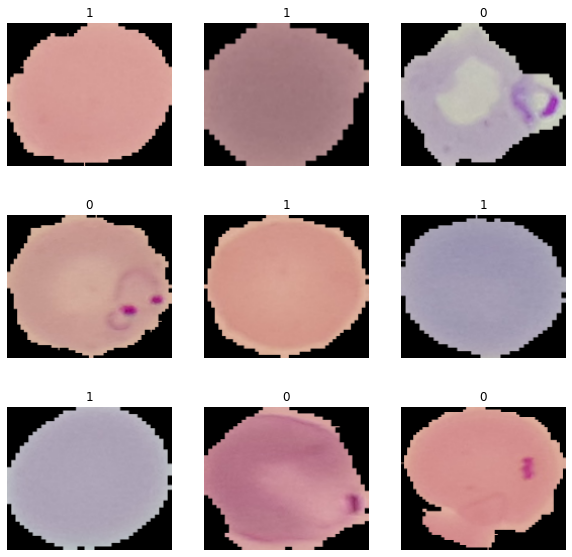

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [11]:
train_data = train_data.prefetch(buffer_size=128)
val_data = val_data.prefetch(buffer_size=128)

In [12]:
callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]
history = model.fit(
                    train_data,
                    epochs=5, batch_size=128, callbacks=callbacks,
                    validation_data=val_data
                    )

Epoch 1/5
 9/41 [=====>........................] - ETA: 47s - loss: 0.6933 - accuracy: 0.5003

KeyboardInterrupt: 